In [48]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cpi
import datetime as dt

In [130]:
spi_93_present_df = yf.download('SPY', start='1993-01-01', end='2024-07-31')

[*********************100%***********************]  1 of 1 completed


In [132]:
spi_93_present_df['Date'] = spi_93_present_df.index

<Axes: xlabel='Date', ylabel='Close'>

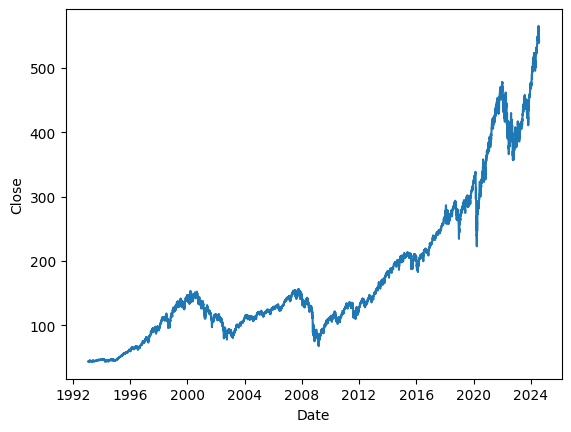

In [134]:
sns.lineplot(x=spi_93_present_df.index, y=spi_93_present_df['Close'])

In [135]:
cpis = []
for year in range(1993, 2024):
    for month in range(1,13):
        cpis.append(cpi.get(year_or_month=dt.date(year=year, month=month, day=1)))

for month in range(1, 8): # through Jan to Jul 2024
    cpis.append(cpi.get(year_or_month=dt.date(year=2024, month=month, day=1)))

cpis = np.array(cpis)

year_mo_combos = [f"{yr}-{mo:02d}" for yr in list(range(1993, 2024)) for mo in list(range(1, 13))]
year_mo_combos = year_mo_combos + [f"2024-{mo:02d}" for mo in list(range(1, 8))]
cpi_df = pd.DataFrame({'year_month': year_mo_combos, 'cpi': cpis})
cpi_df

,year_month,cpi
0,1993-01,142.600
1,1993-02,143.100
2,1993-03,143.600
3,1993-04,144.000
4,1993-05,144.200
...,...,...
374,2024-03,312.332
375,2024-04,313.548
376,2024-05,314.069
377,2024-06,314.175


In [136]:
def left_7_chars(inp: str):
    return (str(inp)[0:7])

spi_93_present_df['year_month'] = spi_93_present_df.index.to_series().apply(left_7_chars)

In [137]:
spi_93_present_df = spi_93_present_df.merge(cpi_df, how='left', on='year_month')

In [138]:
spi_93_present_df['InfAdjClose'] = spi_93_present_df['Close'] / spi_93_present_df['cpi'] * spi_93_present_df[spi_93_present_df['year_month'] == '2024-07']['cpi'].iloc[0]

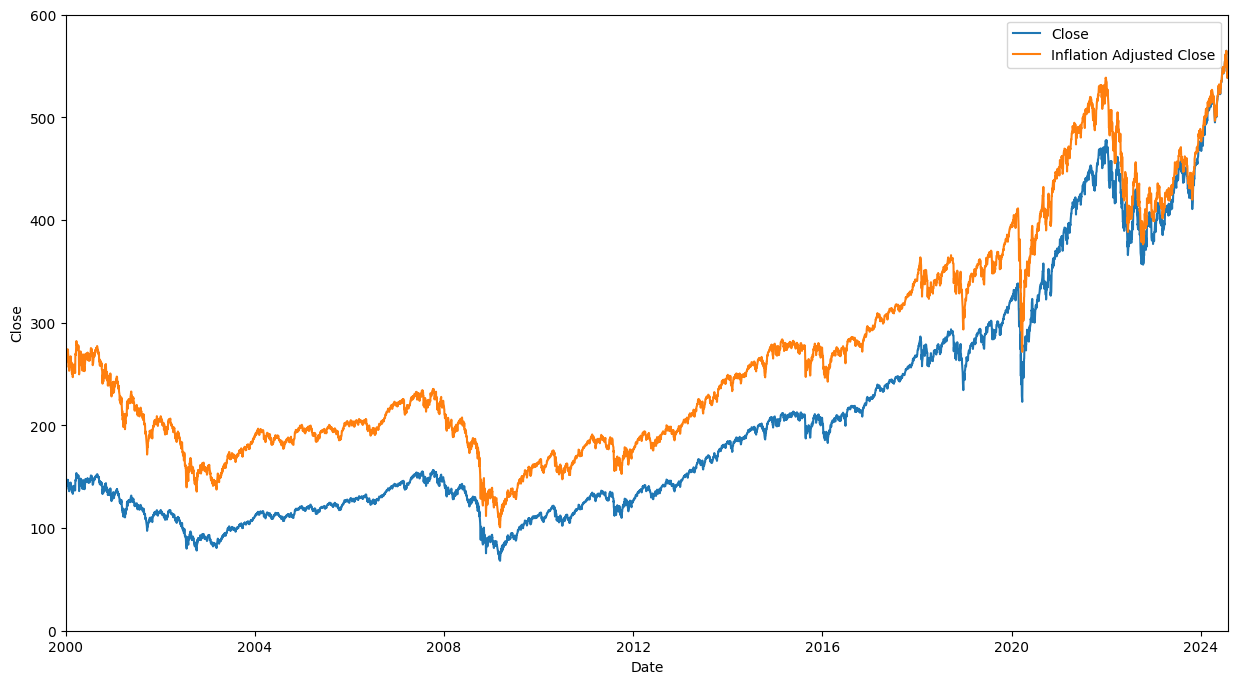

In [164]:
plt.figure(figsize=(15,8))
plt.xlim(left = dt.date(2000, 1, 1), right = dt.date(2024,7,30))
plt.ylim(0, 600)
sns.lineplot(x=spi_93_present_df.Date, y=spi_93_present_df['Close'], label="Close")
sns.lineplot(x=spi_93_present_df.Date, y=spi_93_present_df['InfAdjClose'], label="Inflation Adjusted Close")
plt.show()



,Open,High,Low,Close,Adj Close,Volume,year_month,cpi,InfAdjClose
0,43.968750,43.968750,43.750000,43.937500,24.684107,1003200,1993-01,142.60,96.915156
1,43.968750,44.250000,43.968750,44.250000,24.859676,480500,1993-02,143.10,97.263417
2,44.218750,44.375000,44.125000,44.343750,24.912331,201300,1993-02,143.10,97.469484
3,44.406250,44.843750,44.375000,44.812500,25.175688,529400,1993-02,143.10,98.499817
4,44.968750,45.093750,44.468750,45.000000,25.281015,531500,1993-02,143.10,98.911950
...,...,...,...,...,...,...,...,...,...
7926,548.859985,549.169983,540.289978,541.229980,541.229980,74515300,2024-07,314.54,541.229980
7927,541.349976,547.460022,537.450012,538.409973,538.409973,61158300,2024-07,314.54,538.409973
7928,542.280029,547.190002,541.489990,544.440002,544.440002,53763800,2024-07,314.54,544.440002
7929,546.020020,547.049988,542.719971,544.760010,544.760010,39515800,2024-07,314.54,544.760010
